# Logistic Regression

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/transformed_data_num.csv', index_col=0)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
pd.set_option('display.max_rows', None)

In [6]:
data.head()

,outcometype,animaltype,sex,age,year,neutralized,colormix,breedmix,apricot,black,...,november,october,september,friday,monday,saturday,sunday,thursday,tuesday,wednesday
AnimalID,,,,,,,,,,,,,,,,,,,,,
0,Return_to_owner,1.0,0.0,0.090683,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Euthanasia,0.0,1.0,0.090683,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Adoption,1.0,0.0,0.181614,0.666667,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Transfer,0.0,0.0,0.004997,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Transfer,1.0,0.0,0.181614,0.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.outcometype.value_counts()

Adoption           10574
Transfer            8292
Return_to_owner     4426
Euthanasia          1304
Died                 168
Name: outcometype, dtype: int64

In [8]:
data_ml = data
data_ml = data_ml.dropna()
data_ml["outcometype"] = (data_ml["outcometype"] == "Adoption").astype(np.int) # if adopted 1 else 0
data_ml.head()

,outcometype,animaltype,sex,age,year,neutralized,colormix,breedmix,apricot,black,...,november,october,september,friday,monday,saturday,sunday,thursday,tuesday,wednesday
AnimalID,,,,,,,,,,,,,,,,,,,,,
0,0,1.0,0.0,0.090683,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,1.0,0.090683,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,1.0,0.0,0.181614,0.666667,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.004997,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.181614,0.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='outcometype', ylabel='count'>

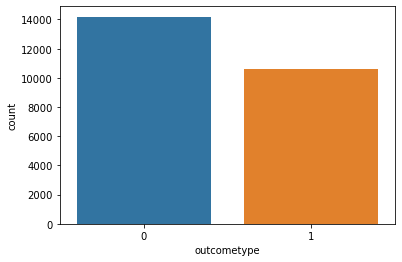

In [10]:
sns.countplot(x = "outcometype", data = data_ml) # pretty even distribution

In [11]:
y = data_ml["outcometype"]
x = data_ml.loc[:, ~data_ml.columns.isin(["outcometype"])]
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.33, random_state=42) # splitting in training & test data

In [12]:
log_reg = LogisticRegression(max_iter = 200)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [13]:
pred_train = log_reg.predict(x_train)
pred_test = log_reg.predict(x_test)

In [14]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      9450
           1       0.68      0.79      0.73      7141

    accuracy                           0.75     16591
   macro avg       0.75      0.76      0.75     16591
weighted avg       0.76      0.75      0.75     16591



In [15]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      4740
           1       0.68      0.78      0.72      3433

    accuracy                           0.75      8173
   macro avg       0.75      0.75      0.75      8173
weighted avg       0.76      0.75      0.75      8173



In [37]:
feature_names = x.columns.tolist()

coefs = pd.DataFrame(
    log_reg.fit(x_train, y_train).coef_.T,
    columns=["Coefficients"],
    index=feature_names,
)

coefs.sort_values(by=['Coefficients'], ascending=False)

,Coefficients
neutralized,3.757408
vizsla,1.365315
leonberger,1.025710
redbone,0.951144
bluetick,0.912531
manx,0.905298
newfoundland,0.865604
landseer,0.863039
affenpinscher,0.860631
english,0.787305


## Confusion matrix

In [ ]:
cm = confusion_matrix(y_test, pred_test)
score = log_reg.score(x_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

The model still seems to have some problems with false positives - i. e. it missclassifies animals, which actually do not get adopted as adopted.

## ROC-curve

In [ ]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, thresholds= metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="adopted/not adopted, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.legend(loc=4)
plt.show()